In [1]:
import os
import pandas as pd
import statsmodels
from sklearn import preprocessing, linear_model, model_selection, metrics

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
pd.set_option('display.notebook_repr_html',True)
%matplotlib notebook

matplotlib.style.use('ggplot')

df = pd.read_csv(os.path.join('..',"data","consumer_complaints.csv.gz"))



//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df

,date_received,product,sub_product,issue,sub_issue,...,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,...,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,...,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,...,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,04/14/2015,Untimely response,No,No,1329963


### Mortgages are product complained about most

In [57]:
products_df = df[ ['product', 'complaint_id'] ].groupby('product').count().rename(columns = {'complaint_id': 'count'}).reset_index()


In [58]:
products_df = products_df.sort_values(by = 'count', ascending = False)

<IPython.core.display.Javascript object>


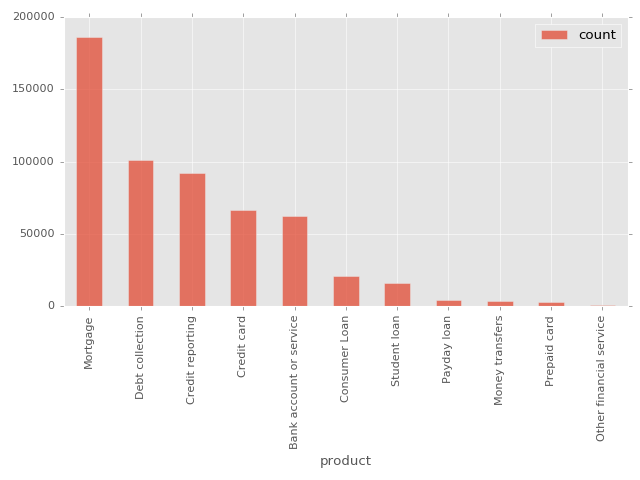

In [59]:
products_df.plot(x = 'product', y ='count', kind = 'bar', alpha = .75, rot = 90)
plt.tight_layout()


In [60]:
df_mortgage_issues = df[df['product'] == 'Mortgage'][['issue','complaint_id']].groupby('issue').count().rename(columns = {'complaint_id': 'count'}).reset_index()

In [61]:
df_mortgage_issues = df_mortgage_issues.sort_values(by = 'count', ascending = False)

### The most common issues are foreclosure & mortgage broker complaints

<IPython.core.display.Javascript object>


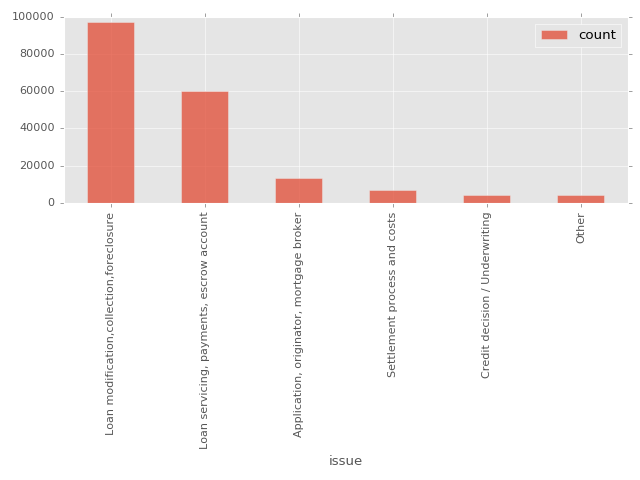

In [62]:
df_mortgage_issues.plot(x='issue', y= 'count', kind = 'bar', alpha=0.75, rot=90)

plt.tight_layout()


In [63]:
df_mortgage_issues_NY = df[df['product'] == 'Mortgage'][df['state'] == 'NY'][['issue','complaint_id']].groupby('issue').count().reset_index()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


## New York's complaints Loan modification, collection and foreclosure were the biggest issues

In [65]:
df_mortgage_issues_NY = df_mortgage_issues_NY.sort_values(by = 'complaint_id', ascending = False)

<IPython.core.display.Javascript object>


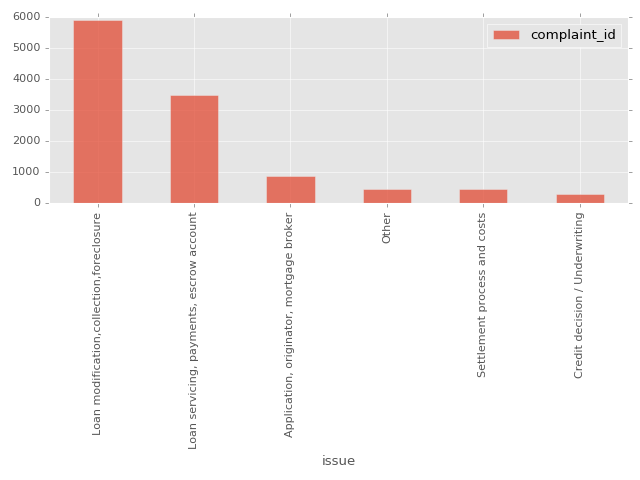

In [66]:
#these look similar to the national average

df_mortgage_issues_NY.plot(x='issue', y= 'complaint_id', kind = 'bar', alpha=0.75, rot=90)
plt.tight_layout()



### Create a product group

In [3]:
df_product = pd.get_dummies(df['product'])

In [4]:
df_product.columns

Index(['Bank account or service', 'Consumer Loan', 'Credit card',
       'Credit reporting', 'Debt collection', 'Money transfers', 'Mortgage',
       'Other financial service', 'Payday loan', 'Prepaid card',
       'Student loan'],
      dtype='object')

In [5]:
df_product = pd.get_dummies(df, columns=['product', 'timely_response'])

### Product grouping

In [6]:
df_product.columns


Index(['date_received', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'consumer_disputed?', 'complaint_id', 'product_Bank account or service',
       'product_Consumer Loan', 'product_Credit card',
       'product_Credit reporting', 'product_Debt collection',
       'product_Money transfers', 'product_Mortgage',
       'product_Other financial service', 'product_Payday loan',
       'product_Prepaid card', 'product_Student loan', 'timely_response_No',
       'timely_response_Yes'],
      dtype='object')

In [95]:
#i want to know what issues people in new york have. are there more foreclosures? 
#foreclosure top 10 : delaware, new jersey, maryland, illinois, south carolina, nevada, florida, ohio, pennsylvania, georgia 



In [75]:
df_with_expanded_product = pd.get_dummies(df, columns=['product'])

In [76]:
df_with_expanded_product.columns

Index(['date_received', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'product_Bank account or service', 'product_Consumer Loan',
       'product_Credit card', 'product_Credit reporting',
       'product_Debt collection', 'product_Money transfers',
       'product_Mortgage', 'product_Other financial service',
       'product_Payday loan', 'product_Prepaid card', 'product_Student loan'],
      dtype='object')

## Complaints by state

In [79]:
df_mortgage_counts_state = df_with_expanded_product.groupby('state').sum()

In [80]:
df_mortgage_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


### Census Data

In [81]:
df_pop_state = pd.read_csv(os.path.join('..',"data","state_pop_abbreviations.csv"))


In [82]:
df_pop_state.head()



,State,State_,Pop
0,.Alabama,AL,"4,863,300"
1,.Alaska,AK,"741,894"
2,.Arizona,AZ,"6,931,071"
3,.Arkansas,AR,"2,988,248"
4,.California,CA,"39,250,017"


In [83]:
df_pop_state

,State,State_,Pop
0,.Alabama,AL,"4,863,300"
1,.Alaska,AK,"741,894"
2,.Arizona,AZ,"6,931,071"
3,.Arkansas,AR,"2,988,248"
4,.California,CA,"39,250,017"
...,...,...,...
46,.Virginia,VT,"8,411,808"
47,.Washington,WA,"7,288,000"
48,.West Virginia,WI,"1,831,102"
49,.Wisconsin,WV,"5,778,708"


In [84]:
df_mortgage_by_counts_state = df_with_expanded_product.groupby(['state']).sum()

In [85]:
df_mortgage_by_counts_state

,complaint_id,product_Bank account or service,product_Consumer Loan,product_Credit card,product_Credit reporting,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,7534741,1.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,2.0
AE,214480925,21.0,15.0,24.0,47.0,...,68.0,0.0,0.0,1.0,10.0
AK,587575953,66.0,19.0,98.0,120.0,...,157.0,0.0,5.0,3.0,17.0
AL,5759014037,600.0,373.0,552.0,1096.0,...,1395.0,8.0,79.0,27.0,164.0
AP,160372554,7.0,9.0,20.0,28.0,...,39.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
VT,853127304,128.0,43.0,156.0,113.0,...,302.0,0.0,1.0,5.0,55.0
WA,11191050471,1094.0,275.0,1284.0,1829.0,...,4315.0,11.0,48.0,50.0,312.0
WI,5754954013,572.0,266.0,993.0,798.0,...,1955.0,7.0,75.0,45.0,209.0


In [86]:
#create a series with summed number of complaints by state

df_mortgage_state_only = df_mortgage_by_counts_state['product_Mortgage']

In [87]:
type(df_mortgage_state_only)

pandas.core.series.Series

In [88]:
df_mortgage_plot = df_mortgage_state_only.to_frame()

<IPython.core.display.Javascript object>


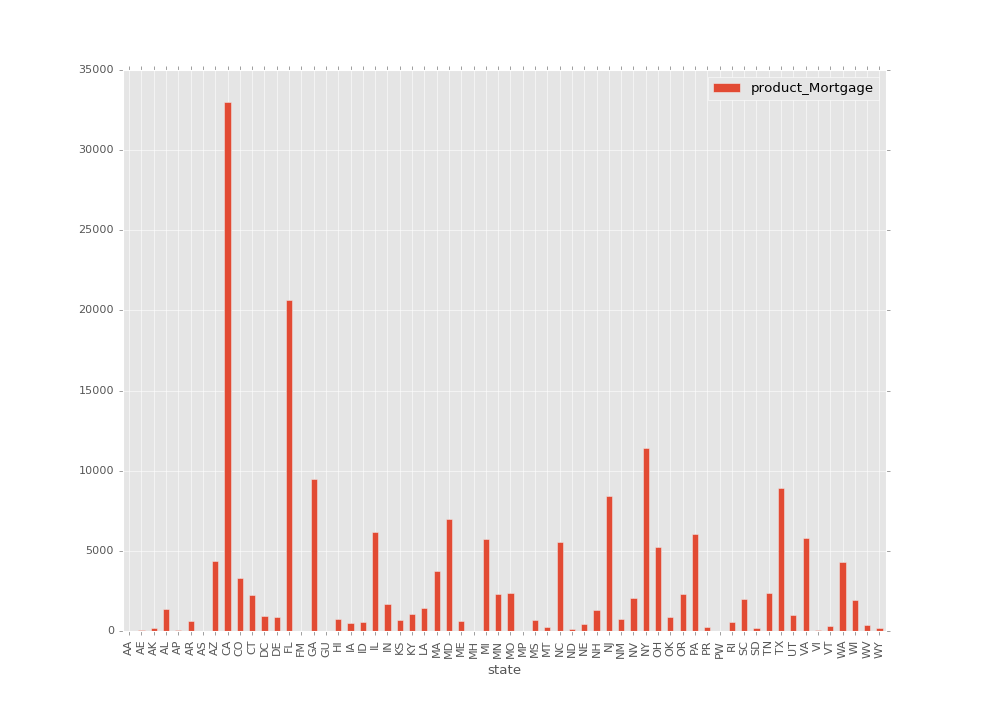

In [89]:
df_mortgage_plot.plot(kind = 'bar')

In [109]:
#turn object into dataframe
df_mortgage_state_complaints = df_mortgage_state_only.to_frame().reset_index()

In [110]:
df_mortgage_state_complaints

,state,product_Mortgage
0,AA,4.0
1,AE,68.0
2,AK,157.0
3,AL,1395.0
4,AP,39.0
...,...,...
57,VT,302.0
58,WA,4315.0
59,WI,1955.0
60,WV,342.0


In [111]:
df_mortgage_state_complaints.state.unique()

array(['AA', 'AE', 'AK', 'AL', 'AP', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [112]:
df_pop_state.State_.unique()

array(['AL', 'AK ', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [113]:
df_mortgage_state_complaints = df_mortgage_state_complaints.merge(right = df_pop_state, how = 'inner', left_on = 'state', right_on = 'State_')

In [114]:
df_mortgage_state_complaints.Pop = df_mortgage_state_complaints.Pop.apply(lambda x: int(x.replace(',', '')))

In [115]:
df_mortgage_state_complaints

,state,product_Mortgage,State,State_,Pop
0,AL,1395.0,.Alabama,AL,4863300
1,AR,619.0,.Arkansas,AR,2988248
2,AZ,4358.0,.Arizona,AZ,6931071
3,CA,32988.0,.California,CA,39250017
4,CO,3303.0,.Colorado,CO,5540545
...,...,...,...,...,...
45,VT,302.0,.Virginia,VT,8411808
46,WA,4315.0,.Washington,WA,7288000
47,WI,1955.0,.West Virginia,WI,1831102
48,WV,342.0,.Wisconsin,WV,5778708


# Per Capita Mortgage Complaints 

In [116]:
df_mortgage_state_complaints

,state,product_Mortgage,State,State_,Pop
0,AL,1395.0,.Alabama,AL,4863300
1,AR,619.0,.Arkansas,AR,2988248
2,AZ,4358.0,.Arizona,AZ,6931071
3,CA,32988.0,.California,CA,39250017
4,CO,3303.0,.Colorado,CO,5540545
...,...,...,...,...,...
45,VT,302.0,.Virginia,VT,8411808
46,WA,4315.0,.Washington,WA,7288000
47,WI,1955.0,.West Virginia,WI,1831102
48,WV,342.0,.Wisconsin,WV,5778708


In [117]:
#create a new column that has the complaints per capita 
#complaints per capita == num of complaints/ population 

In [118]:
df_mortgage_state_complaints.head()




,state,product_Mortgage,State,State_,Pop
0,AL,1395.0,.Alabama,AL,4863300
1,AR,619.0,.Arkansas,AR,2988248
2,AZ,4358.0,.Arizona,AZ,6931071
3,CA,32988.0,.California,CA,39250017
4,CO,3303.0,.Colorado,CO,5540545


In [119]:
df_mortgage_state_complaints['mortgage_complaints_per_capita'] = df_mortgage_state_complaints['product_Mortgage']/ df_mortgage_state_complaints['Pop']


In [120]:
df_mortgage_state_complaints.head()

,state,product_Mortgage,State,State_,Pop,mortgage_complaints_per_capita
0,AL,1395.0,.Alabama,AL,4863300,0.000287
1,AR,619.0,.Arkansas,AR,2988248,0.000207
2,AZ,4358.0,.Arizona,AZ,6931071,0.000629
3,CA,32988.0,.California,CA,39250017,0.000840
4,CO,3303.0,.Colorado,CO,5540545,0.000596


In [126]:
state_mortgage_complaintspc = df_mortgage_state_complaints[['mortgage_complaints_per_capita', 'state']]


NameError: name 'df_mortgage_state_complaints' is not defined

In [127]:
state_mortgage_complaintspc.set_index('state', inplace = True)


NameError: name 'state_mortgage_complaintspc' is not defined

In [125]:
state_mortgage_complaintspc.plot(kind='bar')

NameError: name 'state_mortgage_complaintspc' is not defined

In [92]:
df_mortgage_by_counts_state['product_Mortgage'].plot(kind = "bar")

In [125]:
df_counts_by_state = df_with_expanded_product.groupby(['state']).count()

In [126]:
df_counts_by_state

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,...,product_Mortgage,product_Other financial service,product_Payday loan,product_Prepaid card,product_Student loan
state,,,,,,,,,,,
AA,9,7,9,2,1,...,9,9,9,9,9
AE,219,148,219,88,41,...,219,219,219,219,219
AK,638,420,638,287,66,...,638,638,638,638,638
AL,5635,3987,5635,2651,799,...,5635,5635,5635,5635,5635
AP,153,105,153,78,27,...,153,153,153,153,153
...,...,...,...,...,...,...,...,...,...,...,...
VT,943,674,943,300,95,...,943,943,943,943,943
WA,11554,8441,11554,4442,1518,...,11554,11554,11554,11554,11554
WI,6125,4334,6125,2241,677,...,6125,6125,6125,6125,6125


In [95]:
df_product.drop('company_response_to_consumer', axis = 1, inplace = True) 

In [96]:
df_product.columns

Index(['date_received', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'complaint_id',
       'product_Bank account or service', 'product_Consumer Loan',
       'product_Credit card', 'product_Credit reporting',
       'product_Debt collection', 'product_Money transfers',
       'product_Mortgage', 'product_Other financial service',
       'product_Payday loan', 'product_Prepaid card', 'product_Student loan',
       'timely_response_No', 'timely_response_Yes'],
      dtype='object')

## Predict who complains based on the type of product 

In [123]:
X = df_with_expanded_product[ ['state'] ]
y = df_with_expanded_product.product_Mortgage

In [122]:
type(X)

pandas.core.frame.DataFrame

In [124]:
model = linear_model.LinearRegression()
model.fit(X,y)

print (model.intercept_)
print (model.coef_)

ValueError: could not convert string to float: 'GA'

In [ ]:
logistic regression -- time and state 
    

In [ ]:
df_with_expanded_product.head()

# Random Forest 

In [13]:
from sklearn import tree, ensemble, metrics, model_selection, externals


In [102]:
df_product.drop('date_received', axis = 1, inplace = True) 

In [114]:
df_product.columns

Index(['sub_product', 'issue', 'sub_issue', 'consumer_complaint_narrative',
       'company_public_response', 'company', 'state', 'zipcode', 'tags',
       'consumer_consent_provided', 'submitted_via', 'date_sent_to_company',
       'complaint_id', 'product_Bank account or service',
       'product_Consumer Loan', 'product_Credit card',
       'product_Credit reporting', 'product_Debt collection',
       'product_Money transfers', 'product_Mortgage',
       'product_Other financial service', 'product_Payday loan',
       'product_Prepaid card', 'product_Student loan', 'timely_response_No',
       'timely_response_Yes'],
      dtype='object')

In [115]:
df_product

,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,...,product_Payday loan,product_Prepaid card,product_Student loan,timely_response_No,timely_response_Yes
0,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,...,0,0,0,0,1
1,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,...,0,0,0,0,1
2,NaN,Incorrect information on credit report,Account status,NaN,NaN,...,0,0,0,0,1
3,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,...,0,0,1,0,1
4,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,...,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
555952,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,...,0,0,0,0,1
555953,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,...,0,0,0,1,0
555954,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,...,0,0,0,0,1
555955,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,...,0,0,0,1,0


In [119]:
X = df_product[df_product.columns.values]
X.drop('product_Mortgage', axis = 1, inplace = True)

y = df_product.product_Mortgage

In [120]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .6, random_state = 0)


In [121]:
model = tree.DecisionTreeRegressor(random_state = 0).fit(train_X, train_y)

ValueError: could not convert string to float: '11/04/2015'

In [ ]:
train_y_hat = model.predict(train_X)
print (np.sqrt(metrics.mean_squared_error(train_y, train_y_hat)))

test_y_hat = model.predict(test_X)
print (np.sqrt(metrics.mean_squared_error(test_y, test_y_hat)))

In [140]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

NameError: name 'externals' is not defined

# Date Time Analysis 

In [ ]:
df_datetime = pd.to_datetime(df['date_received'])

In [ ]:
df_datetime.head()